# Análisis de Canasta (Recomendador)

**Equipo:**
* Malváez Flores Axel Daniel
* Peralta Rionda Gabriel Zadquiel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los dos data sets
staff = pd.read_csv('./TablasCleaned/baStaff_cleaned.csv')
stock = pd.read_csv('./TablasCleaned/baStock_cleaned.csv')
invoices = pd.read_csv('./TablasCleaned/baInvoices_cleaned.csv')
invoicesItems = pd.read_csv('./TablasCleaned/baInvoicesItems_cleaned.csv')

In [3]:
invoicesItems

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr
0,1,1,5,de la rosa bianchi grande 45pz,29.000,24.36,4.64,29.0,22.50000,6.50000,1
1,2,2,78,reyma 7oz vaso plastico 50pz,30.000,25.20,4.80,30.0,23.40000,6.60000,1
2,3,2,66,classy cuchara pastelera 50pz,13.000,10.92,2.08,13.0,8.83000,4.17000,2
3,4,3,2568,macma deju 280gr,61.000,51.24,9.76,61.0,48.60000,12.40000,1
4,5,4,732,macma escoces 330gr,57.000,47.88,9.12,57.0,45.49000,11.51000,1
...,...,...,...,...,...,...,...,...,...,...,...
50308,50310,28750,228,12x25 celofan adhesivo 100pz,43.000,36.12,6.88,43.0,27.00000,16.00000,1
50309,50311,28751,62,25x35 pb hoja mediana polipapel,0.069,57.96,11.04,69.0,0.05458,68.94542,1
50310,50312,28752,2490,ricolino kranky mini 25pz,67.000,56.28,10.72,67.0,52.90000,14.10000,1
50311,50313,28753,826,macma selecciones chico 330gr,65.000,54.60,10.40,65.0,0.00000,65.00000,1


In [4]:
tickets = pd.merge(invoicesItems, stock,  how='inner', left_on=['StockID'], right_on = ['StockID'])
tickets = tickets.loc[:,['InvoiceID', 'Description']]
tickets

,InvoiceID,Description
0,1,de la rosa bianchi grande 45pz
1,84,de la rosa bianchi grande 45pz
2,134,de la rosa bianchi grande 45pz
3,224,de la rosa bianchi grande 45pz
4,440,de la rosa bianchi grande 45pz
...,...,...
50308,28026,de la rosa DOTS 20s display extra 20pz 600gr
50309,28055,6x25+3 celofan adhesivo 100pz
50310,28139,BULTO reyma 1014 c/200
50311,28513,lucas muecas tamarindo 10pz 240gr


In [5]:
import re
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'Producto': ['Martillo 123', 'Destornillador plano', 'Llave inglesa 9"', 'Pinzas de punta', 'Taladro eléctrico 220V']}
df = pd.DataFrame(data)

# Definir una función para eliminar strings con números
def eliminar_numeros(string):
    snew = ''
    for s in string.split():
        n = re.sub(r'.*\d.*', '', s)
        snew += n + ' '
    return snew.strip()

# Aplicar la función a la columna 'Producto'
tickets['Description'] = tickets['Description'].apply(eliminar_numeros)
tickets

,InvoiceID,Description
0,1,de la rosa bianchi grande
1,84,de la rosa bianchi grande
2,134,de la rosa bianchi grande
3,224,de la rosa bianchi grande
4,440,de la rosa bianchi grande
...,...,...
50308,28026,de la rosa DOTS display extra
50309,28055,celofan adhesivo
50310,28139,BULTO reyma
50311,28513,lucas muecas tamarindo


In [6]:
for idx, col in tickets.iterrows():
    tickets.loc[idx, 'Description'] = col['Description'].lower().replace('.', '')

In [7]:
tickets.groupby('InvoiceID')['Description'].apply(list).sort_values(ascending=False)

InvoiceID
26350                              [zumbapica zumbafiesta]
26891    [zumbapica zumba goma surtida, zumbapica zumba...
25763    [zumbapica zumba goma surtida, las delicias pu...
1048     [zumbapica zumba goma surtida, laposse bunny r...
19177                       [zumbapica zumba goma surtida]
                               ...                        
23650    [aceite de oliva carbonell, barilla lasaña col...
18261              [aceite de coco san lucas extra virgen]
14970              [aceite de coco san lucas extra virgen]
15966              [aceite de coco san lucas extra virgen]
2660     [a aceite de coco sin olor ni sabor, cimarron ...
Name: Description, Length: 28754, dtype: object

In [8]:
tickets[tickets['InvoiceID'] == 9139]

,InvoiceID,Description
42013,9139,celofan impresa puntos colores chica
42894,9139,celofan lateral
48474,9139,wongs lunetas selfies yoghurt grande


In [9]:
for idx, col in tickets.iterrows():
    tickets.loc[idx, 'Description'] = col['Description'].lower().replace('yoghurt', 'yogurt')

In [10]:
tickets[tickets['InvoiceID'] == 9139]

,InvoiceID,Description
42013,9139,celofan impresa puntos colores chica
42894,9139,celofan lateral
48474,9139,wongs lunetas selfies yogurt grande


In [11]:
ticket = tickets.groupby('InvoiceID')['Description'].apply(list).sort_values(ascending=False)

In [12]:
len(ticket)

28754

In [13]:
# Calculamos el soporte
7 / len(ticket)

0.00024344439034569104

In [14]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# Transformar los datos en un formato compatible con FPGrowth
te = TransactionEncoder()
te_ary = te.fit(ticket).transform(ticket)
df = pd.DataFrame(te_ary, columns=te.columns_)

freq_items = fpgrowth(df, min_support=0.00024344439034569104, use_colnames=True)
freq_items = freq_items.sort_values(by='support', ascending=False)

from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(reyma plato termico bio),(classy cuchara pastelera bio),0.009077,0.028413,0.005599,0.616858,21.710088,0.005341,2.535841,0.962677
1,(dart tapa normal),(dart blanco),0.007651,0.024970,0.004243,0.554545,22.208078,0.004052,2.188842,0.962334
2,(goplas tapa plana termoformada pet),(goplas vaso cristal),0.003791,0.013250,0.003478,0.917431,69.238364,0.003428,11.950635,0.989307
3,(dart tapa),(dart),0.005112,0.014294,0.002782,0.544218,38.074052,0.002709,2.162669,0.978739
4,(reyma plato pastelero bio),(classy cuchara pastelera bio),0.003860,0.028413,0.002330,0.603604,21.243596,0.002220,2.451048,0.956620
...,...,...,...,...,...,...,...,...,...,...
295,"(dart impreso, anguiplast basura jumbo)",(reyma vaso plastico reyma),0.000452,0.018606,0.000243,0.538462,28.940043,0.000235,2.126353,0.965882
296,"(anguiplast basura jumbo, reyma vaso plastico...",(dart impreso),0.000383,0.008381,0.000243,0.636364,75.925311,0.000240,2.726951,0.987207
297,"(classy tenedor sopero bio, servilletas elite)",(classy cuchara sopera bio),0.000452,0.022953,0.000243,0.538462,23.458974,0.000233,2.116934,0.957805
298,"(reyma charola termica, servilletas elite)",(classy cuchara sopera bio),0.000348,0.022953,0.000243,0.700000,30.496667,0.000235,3.256822,0.967546


In [15]:
n_ventas = pd.value_counts(invoicesItems['StockID'].values, sort=True)
n_ventas = pd.DataFrame(n_ventas, columns=['no_ventas'])

In [16]:
n_ventas = pd.value_counts(invoicesItems['StockID'].values, sort=True)
n_ventas = n_ventas.rename_axis('StockID').reset_index(name='no_ventas')
n_ventas.head(10)

,StockID,no_ventas
0,66,1009
1,68,660
2,1187,645
3,79,631
4,118,455
5,2295,412
6,972,351
7,121,348
8,968,343
9,245,317


In [17]:
stock.iloc[65,:]

StockID                                                        66
Familly                                                    CLASSY
Item                            classy cuchara pastelera bio 50pz
CAJA_onehot                                                     0
BULTO_onehot                                                    0
CostPrice                                                     9.6
QtyMinimum                                                     60
BarCode                                                       666
PriceList                                                    13.0
QtyAvailable                                                   82
QtyAvailableForStore                                           65
VersionSync                                                168764
AverageSaleQty                                             2003.0
CommentWhenAvailableForStore           82 disponible de inmediato
Name: 65, dtype: object

In [18]:
item_aleatorio = stock[stock['StockID'] == 66]['Item'].values[0]
item_aleatorio = eliminar_numeros(item_aleatorio)

In [19]:
rules[rules['antecedents'].apply(lambda x: item_aleatorio in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,"(reyma charola termica, classy cuchara pastele...",(classy cuchara sopera bio),0.001565,0.022953,0.000869,0.555556,24.203704,0.000834,2.198355,0.960187
24,"(classy cuchara pastelera bio, classy cuchara ...",(reyma vaso plastico reyma),0.001252,0.018606,0.000730,0.583333,31.351713,0.000707,2.355345,0.969317
33,"(classy cuchara pastelera bio, reyma charola t...",(classy cuchara sopera bio),0.001043,0.022953,0.000626,0.600000,26.140000,0.000602,2.442617,0.962749
54,"(classy cuchara pastelera bio, reyma plato gra...",(classy cuchara sopera bio),0.000522,0.022953,0.000487,0.933333,40.662222,0.000475,14.655700,0.975916
55,"(reyma charola termica, classy cuchara pastele...",(reyma vaso plastico reyma),0.000869,0.018606,0.000452,0.520000,27.947813,0.000436,2.044571,0.965058
56,"(reyma charola termica, classy cuchara pastele...",(classy cuchara sopera bio),0.000626,0.022953,0.000452,0.722222,31.464815,0.000438,3.517368,0.968825
58,"(classy cuchara pastelera bio, goplas tapa pla...",(goplas vaso cristal),0.000452,0.013250,0.000452,1.000000,75.469816,0.000446,inf,0.987196
63,"(dart tazon, classy cuchara pastelera bio)",(classy cuchara sopera bio),0.000556,0.022953,0.000417,0.750000,32.675000,0.000405,3.908187,0.969935
70,"(reyma charola termica, classy cuchara pastele...",(classy cuchara sopera bio),0.000522,0.022953,0.000417,0.800000,34.853333,0.000405,4.885233,0.971815
72,"(classy cuchara pastelera bio, classy cuchara ...",(reyma charola termica),0.000765,0.011338,0.000417,0.545455,48.110429,0.000409,2.175057,0.979964


In [20]:
rules[rules['consequents'].apply(lambda x: item_aleatorio in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(reyma plato termico bio),(classy cuchara pastelera bio),0.009077,0.028413,0.005599,0.616858,21.710088,0.005341,2.535841,0.962677
4,(reyma plato pastelero bio),(classy cuchara pastelera bio),0.003860,0.028413,0.002330,0.603604,21.243596,0.002220,2.451048,0.956620
10,"(reyma vaso plastico reyma, reyma plato termi...",(classy cuchara pastelera bio),0.002261,0.028413,0.001635,0.723077,25.448414,0.001570,3.508507,0.962881
13,"(classy cuchara sopera bio, reyma plato termic...",(classy cuchara pastelera bio),0.001669,0.028413,0.001252,0.750000,26.395961,0.001205,3.886346,0.963724
21,"(reyma vaso plastico reyma, reyma plato termi...",(classy cuchara pastelera bio),0.001600,0.028413,0.000800,0.500000,17.597307,0.000754,1.943173,0.944684
25,"(classy cuchara sopera bio, reyma vaso plasti...",(classy cuchara pastelera bio),0.000974,0.028413,0.000730,0.750000,26.395961,0.000703,3.886346,0.963053
28,"(reyma vaso plastico, reyma plato termico bio)",(classy cuchara pastelera bio),0.001009,0.028413,0.000661,0.655172,23.058540,0.000632,2.817601,0.957598
34,"(classy cuchara sopera bio, reyma charola term...",(classy cuchara pastelera bio),0.001252,0.028413,0.000626,0.500000,17.597307,0.000590,1.943173,0.944355
42,"(reyma vaso plastico, reyma plato termico bio)",(classy cuchara pastelera bio),0.001078,0.028413,0.000556,0.516129,18.164962,0.000526,2.007946,0.945969
43,"(reyma plato termico bio, reyma mariel bio)",(classy cuchara pastelera bio),0.000765,0.028413,0.000556,0.727273,25.596083,0.000535,3.562484,0.961667


### Transacciones en meses importantes para el vendedor
El dueño de la tienda nos comenta que los meses con más ventas son los meses de     Abril, Octubre y Diciembre, esto lo verificaremos viendo la cantidad de ventas que tiene por cada mes.

In [21]:
# Limpieza de datos de la columnas Date Creation y Date Invoice
invoices['Date Creation'] = pd.to_datetime(invoices['Date Creation'], format='%Y-%m-%d %H:%M:%S')
invoices['Date Invoice'] = pd.to_datetime(invoices['Date Invoice'], format='%Y-%m-%d')

Antes de empezar con el análisis de las ventas tenemos que ver el año con que contamos y ver la fecha minima con la que estamos trabajando y la fecha máxima.

In [22]:
# filtrar las fechas que son del año 2022
son_del_2022 = (invoices['Date Invoice'].dt.year == 2022).all()

# encontrar la fecha mínima
fecha_minima = invoices['Date Invoice'].min()

# encontrar la fecha máxima
fecha_maxima = invoices['Date Invoice'].max()

print(f'Todas las fechas son del año 2022: {son_del_2022}')
print(f'Fecha mínima: {fecha_minima}')
print(f'Fecha máxima: {fecha_maxima}')

Todas las fechas son del año 2022: True
Fecha mínima: 2022-01-10 00:00:00
Fecha máxima: 2022-12-19 00:00:00


Notamos que todos nuestros datos son pertenecientes al año 2022 y que la menor fecha que se realizo una venta en nuestro conjunto de datos es del 2022-01-10 y la última venta del año se realizo el 2022-12-19.  
Ya entendiendo estos datos podemos hacer el análisis requerido.

In [23]:
#Creamos una columna en la que nos guarde el mes de la compra
invoices['mes'] = invoices['Date Invoice'].dt.month

In [24]:
meses = {1: 'Enero',2: 'Febrero',3: 'Marzo',4: 'Abril',5: 'Mayo',6: 'Junio',7: 'Julio',8: 'Agosto',9: 'Septiembre',10: 'Octubre',11: 'Noviembre',12: 'Diciembre'}

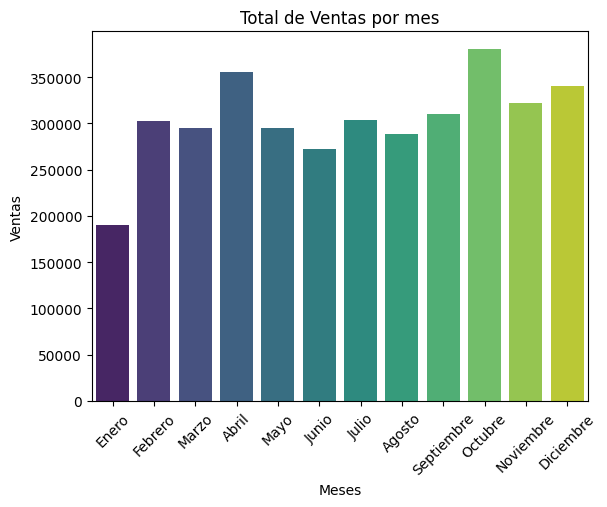

In [25]:
#Vemos la cantidad de ventas que tiene el negocio por mes.
total_por_mes = invoices.groupby('mes')['Total'].sum().reset_index()
total_por_mes['mes'] = total_por_mes['mes'].replace(meses)

sns.barplot(x='mes', y='Total', data=total_por_mes, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.title('Total de Ventas por mes')
plt.show()

In [26]:
total_por_mes

,mes,Total
0,Enero,190523.58
1,Febrero,302677.96
2,Marzo,295208.47
3,Abril,355511.91
4,Mayo,295318.88
5,Junio,272288.56
6,Julio,303675.31
7,Agosto,288869.15
8,Septiembre,310547.74
9,Octubre,380521.70


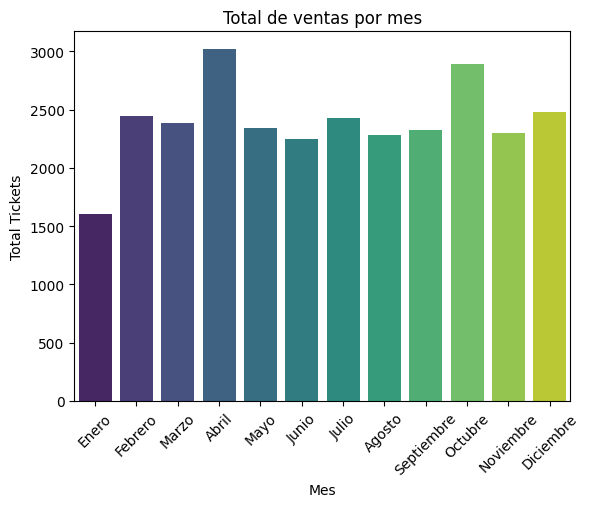

In [27]:
# contar el número de transacciones por mes
num_transacciones_por_mes = invoices.groupby('mes')['Total'].count().reset_index()
num_transacciones_por_mes['mes'] = num_transacciones_por_mes['mes'].replace(meses)

sns.barplot(x='mes', y='Total', data=num_transacciones_por_mes, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Total Tickets')
plt.title('Total de ventas por mes')
plt.show()


Con esto podemos notar que el dueño nos proporciono la información correcta sobre los meses que tiene mayor movimiento de ventas, algo que el dueño no nos comento es que aunque el mes de octubre es el que genera mayores ganancias, este no es el mes en el que se generan más tickets generados es el mes de Abril, esto nos indicaría que en el mes de Abril van más personas a la dulcería a comprar pero en cantidad de productos estos consumen menos que comparado con el mes de octubre.

### Predicción de inventario para el mes de Abril

Notamos que tenemos productos que su precio de unidad esta calculado como el precio de unidad por el paquete, por ejemplo si vendemos paquete de hojas de polipapel, nos esta indicando el precio de cuanto sale cada hoja, pero esto es inecesario ya que solo nos importa la venta de todo el paquete. Por ello transformaremos esos valores.

In [28]:
invoicesItems[invoicesItems['Price Unit'] < 1].head()

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr
79,80,51,2607,20x30 mapposa poliseda-rollo,0.092,72.6432,13.8368,86.48,73.00000,13.48000,2
127,128,79,2410,catsup doña chuy,0.026,50.8872,9.6928,60.58,0.02062,60.55938,1
304,305,178,1489,30x40 mapposa poliseda-rollo,0.092,169.2432,32.2368,201.48,0.07300,201.40700,1
492,493,285,193,delicia azucar refinada 5gr sobre,0.046,44.6292,8.5008,53.13,0.03760,53.09240,1
557,558,329,62,25x35 pb hoja-kileada,0.068,57.1200,10.8800,68.00,0.05377,67.94623,2


In [29]:
idx = invoicesItems[invoicesItems['Price Unit'] < 1].index 
invoicesItems.loc[idx, 'Price Unit'] = invoicesItems.loc[idx, 'Total']

In [30]:
invoicesItems.loc[idx,:].head()

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr
79,80,51,2607,20x30 mapposa poliseda-rollo,86.48,72.6432,13.8368,86.48,73.00000,13.48000,2
127,128,79,2410,catsup doña chuy,60.58,50.8872,9.6928,60.58,0.02062,60.55938,1
304,305,178,1489,30x40 mapposa poliseda-rollo,201.48,169.2432,32.2368,201.48,0.07300,201.40700,1
492,493,285,193,delicia azucar refinada 5gr sobre,53.13,44.6292,8.5008,53.13,0.03760,53.09240,1
557,558,329,62,25x35 pb hoja-kileada,68.00,57.1200,10.8800,68.00,0.05377,67.94623,2


Notamos que la información que nos proporciona invoicesItems no nos indica el número de productos que se estan vendiendo de ese producto, pero esto lo podemos sacar del precio de unidad y el Total.

In [31]:
invoicesItems[invoicesItems['Price Unit'] != invoicesItems['Total']].head(2)

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr
27,28,20,1398,candy pop malvalleno mix 50pz 400gr,51.0,85.68,16.32,102.0,42.2,59.8,2
42,43,27,932,bremen fruti 336gr 21pz,53.0,89.04,16.96,106.0,45.8,60.2,2


In [32]:
invoicesItems['Cantidad'] = invoicesItems['Total'] / invoicesItems['Price Unit']

In [33]:
invoicesItems.head()

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr,Cantidad
0,1,1,5,de la rosa bianchi grande 45pz,29.0,24.36,4.64,29.0,22.50,6.50,1,1.0
1,2,2,78,reyma 7oz vaso plastico 50pz,30.0,25.20,4.80,30.0,23.40,6.60,1,1.0
2,3,2,66,classy cuchara pastelera 50pz,13.0,10.92,2.08,13.0,8.83,4.17,2,1.0
3,4,3,2568,macma deju 280gr,61.0,51.24,9.76,61.0,48.60,12.40,1,1.0
4,5,4,732,macma escoces 330gr,57.0,47.88,9.12,57.0,45.49,11.51,1,1.0


Ya con la limpieza de los datos podemos ver la predicción de mas menos cuanto de cada producto necesitaremos para los meses en que tenemos más ventas.

In [34]:
# Le añadimos una columna en donde indique la fecha en que indique el mes en que se vendio el producto
invoicesItems_M = invoicesItems.merge(invoices[['InvoiceID', 'mes']], on='InvoiceID', how='left')

In [35]:
transacciones_mes = invoicesItems_M.groupby('mes')
Abril = transacciones_mes.get_group(4)
Octubre = transacciones_mes.get_group(10)
Diciembre = transacciones_mes.get_group(12)
Abril

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr,Cantidad,mes
11568,11569,6430,798,procali hielatto cobertura cremoso extremo 1k,84.0,70.56,13.44,84.0,66.66,17.34,1,1.0,4
11569,11570,6431,413,"madera brocheta 10"" 25cm 100pz",24.0,20.16,3.84,24.0,15.00,9.00,1,1.0,4
11570,11571,6432,1162,ricolino bubulubu mini fresa crush 25pz 500gr,64.0,53.76,10.24,64.0,48.80,15.20,1,1.0,4
11571,11572,6433,1020,la corona huevitos 500gr chica,51.0,42.84,8.16,51.0,40.20,10.80,1,1.0,4
11572,11573,6434,3010,inix contenedores cuadrados pet 32SD 25pz,62.0,52.08,9.92,62.0,49.00,13.00,1,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16768,16769,9447,875,cuetara oblea barquillos chocolate 570gr,64.0,53.76,10.24,64.0,51.00,13.00,3,1.0,4
16769,16770,9448,2002,heinz tomate ketchup grande 3kg pouch,100.0,84.00,16.00,100.0,79.83,20.17,1,1.0,4
16770,16771,9449,942,jaguar 16 largo 25pz 570ml,34.0,114.24,21.76,136.0,26.50,109.50,1,4.0,4
16771,16772,9449,359,solo tapa domo DLR662 100pz,140.0,117.60,22.40,140.0,112.00,28.00,2,1.0,4


In [36]:
productos_A = Abril.groupby('Description')['Cantidad'].sum().reset_index()
productos_O = Octubre.groupby('Description')['Cantidad'].sum().reset_index()
productos_D = Diciembre.groupby('Description')['Cantidad'].sum().reset_index()

### Productos que se vendieron en el mes de Abril y la cantidad de productos vendidos

In [37]:
productos_A

,Description,Cantidad
0,100gr celofan fuelle 100pz,2.0
1,10x15 bolsa chica 500gr,1.0
2,10x15 celofan adhesivo 100pz,2.0
3,10x15 celofan cenefa 100pz,1.0
4,10x20 celofan adhesivo 100pz,1.0
...,...,...
1269,zafra crema pastelera vainilla economica 1kg,6.0
1270,zulka azucar glass 500gr,3.0
1271,zumbapica zumba goma mango 20pz,1.0
1272,zumbapica zumba goma sandia 20pz,3.0


### Productos que se vendieron en el mes de Octubre y la cantidad de productos vendidos

In [38]:
productos_O

,Description,Cantidad
0,.reyma 4CH vaso reyma 50pz,9.0
1,.reyma 7oz VASO plastico 50pz,1.0
2,1-1/2kg celofan fuelle 100pz,1.0
3,10x10 celofan adhesivo 100pz,1.0
4,10x15 bolsa chica 500gr,1.0
...,...,...
1245,zumbapica mix cuchara 20pz 360gr,5.0
1246,zumbapica mix vaso 10pz 350gr,2.0
1247,zumbapica zumba goma fresa 20pz 440gr,1.0
1248,zumbapica zumba goma sandia 20pz 440gr,2.0


### Productos que se vendieron en el mes de Diciembre y la cantidad de productos vendidos

In [39]:
productos_D

,Description,Cantidad
0,.sabritas doritos nachos 38gr 30pz,6.0
1,1-1/2kg celofan fuelle 100pz,2.0
2,100gr celofan fuelle 100pz,1.0
3,10x10 celofan adhesivo 100pz,3.0
4,10x15 celofan adhesivo 100pz,3.0
...,...,...
1064,zumbapica mix cuchara 20pz 360gr,2.0
1065,zumbapica zumba goma mango 20pz 440gr,3.0
1066,zumbapica zumba goma sandia 20pz 440gr,1.0
1067,zumbapica zumba goma surtida 20pz,1.0


## Predicción

* Para el mes de Diciembre

In [40]:
# Ordenamos los productos por la cantidad de ventas
productos_D.sort_values(by='Cantidad', ascending=False, inplace=True)
productos_D

,Description,Cantidad
254,dart 10JY10 blanco 25pz,164.0
220,classy cuchara SOPERA bio 25pz,138.0
984,totis donitas limon y sal sobrecito 25pz,128.0
845,reyma 6 plato pastelero bio 25pz,94.0
223,classy cuchara pastelera bio 50pz,94.0
...,...,...
487,inix tapa domo 4oz sin perforar 75mm 50pz,1.0
488,inix tapa pet AD-L1 25pz,1.0
194,candy pop super supers 20pz 500gr,1.0
765,papel encerado rollo alegria pergamino 20m,1.0


* Para el mes de Octubre

In [116]:
productos_O.sort_values(by='Cantidad', ascending=False, inplace=True)
top50_O = productos_O.head(50)

In [41]:
# Obtenemos los 50 productos más vendidos
top_50 = productos_D.head(50)
top_50

,Description,Cantidad
254,dart 10JY10 blanco 25pz,164.0
220,classy cuchara SOPERA bio 25pz,138.0
984,totis donitas limon y sal sobrecito 25pz,128.0
845,reyma 6 plato pastelero bio 25pz,94.0
223,classy cuchara pastelera bio 50pz,94.0
853,reyma 8oz vaso plastico 50pz,83.0
260,dart 16J165R vaso blanco 20pz vaso,76.0
268,dart 8JY8 blanco 25pz,64.0
834,reyma 10oz vaso plastico 50pz,59.0
840,reyma 2Div 9-2D 25pz,58.0


In [68]:
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,IVA,Total,Total letter,StaffID,Barcode,mes,hour,dia,dia_nombre
1936,1937,1937,2022-02-04 16:34:52,2022-02-04,127.68,24.32,152.0,(CIENTO CINCUENTA Y DOS PESOS 00/100 M.N.),LORENA,3019374,2,16,04,Friday
4309,4310,4310,2022-03-04 16:58:56,2022-03-04,68.04,12.96,81.0,(OCHENTA Y UN PESOS 00/100 M.N.),LORENA,3043107,3,16,04,Friday
4336,4337,4337,2022-03-04 18:31:39,2022-03-04,66.36,12.64,79.0,(SETENTA Y NUEVE PESOS 00/100 M.N.),LORENA,3043374,3,18,04,Friday
4337,4338,4338,2022-03-04 18:32:57,2022-03-04,101.64,19.36,121.0,(CIENTO VEINTIUN PESOS 00/100 M.N.),MARYCRUZ,3043383,3,18,04,Friday
4330,4331,4331,2022-03-04 18:22:29,2022-03-04,76.44,14.56,91.0,(NOVENTA Y UN PESOS 00/100 M.N.),MARYCRUZ,3043310,3,18,04,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13462,13463,13461,2022-06-22 17:28:55,2022-06-22,136.92,26.08,163.0,(CIENTO SESENTA Y TRES PESOS 00/100 M.N.),LORENA,3134639,6,17,22,Wednesday
13429,13430,13428,2022-06-22 13:06:45,2022-06-22,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),CARMEN,3134301,6,13,22,Wednesday
13435,13436,13434,2022-06-22 13:50:23,2022-06-22,38.64,7.36,46.0,(CUARENTA Y SEIS PESOS 00/100 M.N.),CARMEN,3134365,6,13,22,Wednesday
13451,13452,13450,2022-06-22 15:48:31,2022-06-22,47.88,9.12,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),CARMEN,3134523,6,15,22,Wednesday


In [42]:
# Ordenamos los productos por la longitud de su antecedente
longitudes = rules['antecedents'].apply(lambda x: len(list(x))).sort_values(ascending=False)
longitudes

273    4
270    4
271    4
272    4
183    3
      ..
86     1
83     1
81     1
80     1
150    1
Name: antecedents, Length: 300, dtype: int64

In [43]:
# Obtenemos las combinaciones de 3 y 2 productos
from itertools import combinations
sin_nums_top_50 = top_50['Description'].apply(lambda x : eliminar_numeros(x))
combs_3 = list(combinations(frozenset(sin_nums_top_50), 3))
combs_3 = [frozenset(x) for x in combs_3]
combs_2 = list(combinations(frozenset(sin_nums_top_50), 2))
combs_2 = [frozenset(x) for x in combs_2]

In [44]:
# Obtenemos los productos que se deben comprar, en función de si alguna combinación 
# de 3, 2 o 1 producto se encuentra en las reglas y de ser así obtenemos el consecuente

from collections import Counter

antecedentes = rules['antecedents'].tolist()
consecuentes = rules['consequents'].tolist()

abastecerse = []
antecedentes_encontrados = []

# Iteración para combinaciones de 3 elementos
for comb in combs_3:
    if comb in antecedentes:
        idx = antecedentes.index(comb)
        abastecerse.append(','.join(map(str, consecuentes[idx])))
        antecedentes_encontrados.append(comb)
    
# Iteración para combinaciones de 2 elementos
for comb in combs_2:
    if comb in antecedentes:
        idx = antecedentes.index(comb)
        abastecerse.append(','.join(map(str, consecuentes[idx])))
        antecedentes_encontrados.append(comb)
        
# Iteración para combinaciones de 1 elementos
for i in top_50.iterrows():
    item = i[1][0]
    item = eliminar_numeros(item)
    if frozenset({item}) in antecedentes:
        idx = antecedentes.index(frozenset({item}))
        abastecerse.append(','.join(map(str, consecuentes[idx])))
        antecedentes_encontrados.append(frozenset({item}))
        
antecedentes_encontrados = [list(x) for x in antecedentes_encontrados]
antecedentes_encontrados

[['de la rosa bianchi mini mini', 'klass winis originales grande'],
 ['de la rosa bianchi mini mini', 'ricolino duvalin'],
 ['reyma  vaso plastico', 'reyma'],
 ['reyma  vaso plastico', 'reyma  plato pastelero bio'],
 ['klass winis originales grande', 'totis donitas limon y sal sobrecito'],
 ['classy cuchara pastelera bio', 'reyma'],
 ['reyma  plato pastelero bio'],
 ['dart  vaso blanco  vaso']]

In [45]:
# Agrupamos los productos por mes y obtenemos los tickets de dicho mes

transacciones_mes = invoicesItems_M.groupby('mes')
Diciembre = transacciones_mes.get_group(12)
Diciembre_tickets = Diciembre.groupby('InvoiceID')['Description'].apply(list)
idx = Diciembre_tickets.index

for ind in idx:
    Diciembre_tickets.loc[ind] = [eliminar_numeros(x) for x in Diciembre_tickets.loc[ind]]

tickets_dic = list(Diciembre_tickets.values)

In [46]:
# Contamos cuántas veces aparecen nuestros antecedentes encontrados
contador = {str(x):0 for x in antecedentes_encontrados}

for ticket in tickets_dic:
    for comb in antecedentes_encontrados:
        if set(comb).issubset(ticket):
            contador[str(comb)] += 1
            
contador

{"['de la rosa bianchi mini mini', 'klass winis originales grande']": 3,
 "['de la rosa bianchi mini mini', 'ricolino duvalin']": 0,
 "['reyma  vaso plastico', 'reyma']": 13,
 "['reyma  vaso plastico', 'reyma  plato pastelero bio']": 7,
 "['klass winis originales grande', 'totis donitas limon y sal sobrecito']": 7,
 "['classy cuchara pastelera bio', 'reyma']": 6,
 "['reyma  plato pastelero bio']": 53,
 "['dart  vaso blanco  vaso']": 28}

In [69]:
top_50

,Description,Cantidad
254,dart 10JY10 blanco 25pz,164.0
220,classy cuchara SOPERA bio 25pz,138.0
984,totis donitas limon y sal sobrecito 25pz,128.0
845,reyma 6 plato pastelero bio 25pz,94.0
223,classy cuchara pastelera bio 50pz,94.0
853,reyma 8oz vaso plastico 50pz,83.0
260,dart 16J165R vaso blanco 20pz vaso,76.0
268,dart 8JY8 blanco 25pz,64.0
834,reyma 10oz vaso plastico 50pz,59.0
840,reyma 2Div 9-2D 25pz,58.0


In [92]:
ids = invoices[invoices['mes'] == 12]['InvoiceID'].reindex()
ids

27212    27213
27214    27215
27282    27283
27281    27282
27241    27242
         ...  
27024    27025
27056    27057
27020    27021
27025    27026
27043    27044
Name: InvoiceID, Length: 2481, dtype: int64

In [98]:
invoicesItems[invoicesItems['InvoiceID'] == ids[27213]]

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr,Cantidad
47618,47620,27214,903,prisma tamborines 100pz 450gr bolsa,64.0,53.76,10.24,64.0,51.0,13.0,1,1.0


In [47]:
# Dado que tenemos la confianza de las reglas, podemos saber cuántos productos se deben comprar
# para que se cumpla la confianza de la regla
for i in range(len(antecedentes_encontrados)):
    print(f'{antecedentes_encontrados[i]} se vende con una confianza del 50 % con {abastecerse[i]}')
    print(f'Si se compra {antecedentes_encontrados[i]} se necesita de al menos una cantidad de {round(contador[str(antecedentes_encontrados[i])]*.5)} de {abastecerse[i]}')
    print('')

['de la rosa bianchi mini mini', 'klass winis originales grande'] se vende con una confianza del 50 % con ricolino bocadin
Si se compra ['de la rosa bianchi mini mini', 'klass winis originales grande'] se necesita de al menos una cantidad de 2 de ricolino bocadin

['de la rosa bianchi mini mini', 'ricolino duvalin'] se vende con una confianza del 50 % con ricolino bocadin
Si se compra ['de la rosa bianchi mini mini', 'ricolino duvalin'] se necesita de al menos una cantidad de 0 de ricolino bocadin

['reyma  vaso plastico', 'reyma'] se vende con una confianza del 50 % con classy cuchara sopera bio
Si se compra ['reyma  vaso plastico', 'reyma'] se necesita de al menos una cantidad de 6 de classy cuchara sopera bio

['reyma  vaso plastico', 'reyma  plato pastelero bio'] se vende con una confianza del 50 % con classy cuchara pastelera bio
Si se compra ['reyma  vaso plastico', 'reyma  plato pastelero bio'] se necesita de al menos una cantidad de 4 de classy cuchara pastelera bio

['klass wi

In [114]:
lista = ['ricolino bocadin 50pz 525gr', 'classy cuchara SOPERA bio 25pz', 'classy cuchara pastelera bio 50pz', 'reyma 8oz vaso plastico 50pz', 'dart 10JY10 blanco 25pz']
cantidad = [6, 6, 30, 3, 14]

suma = 0
for i in range(len(lista)):
    x = invoicesItems[invoicesItems['Description'] == lista[i]]['Ganancia']
    idx = list(x.index)
    x = x[idx[0]] * cantidad[i]
    suma += x
suma

880.48

## Análisis de ventas por hora

In [48]:
invoices['hour'] = invoices['Date Creation'].dt.strftime('%H')
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,IVA,Total,Total letter,StaffID,Barcode,mes,hour
0,1,1,2022-01-11 10:15:06,2022-01-11,24.36,4.64,29.0,(VEINTINUEVE PESOS 00/100 M.N.),3,3000019,1,10
1,2,2,2022-01-11 10:29:02,2022-01-11,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000028,1,10
2,3,3,2022-01-10 10:43:53,2022-01-10,51.24,9.76,61.0,(SESENTA Y UN PESOS 00/100 M.N.),3,3000037,1,10
3,4,4,2022-01-10 10:44:34,2022-01-10,47.88,9.12,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),3,3000046,1,10
4,5,5,2022-01-10 10:44:57,2022-01-10,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000055,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
28749,28750,28740,2022-12-19 18:52:34,2022-12-19,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),2,3287505,12,18
28750,28751,28741,2022-12-19 18:57:23,2022-12-19,57.96,11.04,69.0,(SESENTA Y NUEVE PESOS 00/100 M.N.),3,3287514,12,18
28751,28752,28742,2022-12-19 18:56:35,2022-12-19,56.28,10.72,67.0,(SESENTA Y SIETE PESOS 00/100 M.N.),2,3287523,12,18
28752,28753,28743,2022-12-19 18:59:11,2022-12-19,54.60,10.40,65.0,(SESENTA Y CINCO PESOS 00/100 M.N.),2,3287532,12,18


In [49]:
invoices.sort_values(by='hour', ascending=False, inplace=True)
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,IVA,Total,Total letter,StaffID,Barcode,mes,hour
10496,10497,10495,2022-05-13 22:34:20,2022-05-13,27.72,5.28,33.0,(TREINTA Y TRES PESOS 00/100 M.N.),1,3104976,5,22
11355,11356,11354,2022-05-25 22:10:30,2022-05-25,57.12,10.88,68.0,(SESENTA Y OCHO PESOS 00/100 M.N.),1,3113569,5,22
16464,16465,16462,2022-07-31 22:31:33,2022-07-31,30.24,5.76,36.0,(TREINTA Y SEIS PESOS 00/100 M.N.),1,3164657,7,22
4344,4345,4345,2022-03-04 22:55:07,2022-03-04,21.84,4.16,26.0,(VEINTISEIS PESOS 00/100 M.N.),1,3043453,3,22
12680,12681,12679,2022-06-12 21:55:01,2022-06-12,25.20,4.80,30.0,(TREINTA PESOS 00/100 M.N.),1,3126815,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...
14102,14103,14101,2008-06-13 00:08:29,2022-07-01,322.56,61.44,384.0,(TRESCIENTOS OCHENTA Y CUATRO PESOS 00/100 M.N.),1,3141037,7,00
14421,14422,14420,2008-06-13 00:17:52,2022-07-06,54.60,10.40,65.0,(SESENTA Y CINCO PESOS 00/100 M.N.),1,3144222,7,00
14427,14428,14426,2008-06-13 00:43:20,2022-07-06,10.92,2.08,13.0,(TRECE PESOS 00/100 M.N.),4,3144286,7,00
17052,17053,17050,2008-06-13 00:03:47,2022-08-09,66.36,12.64,79.0,(SETENTA Y NUEVE PESOS 00/100 M.N.),3,3170532,8,00


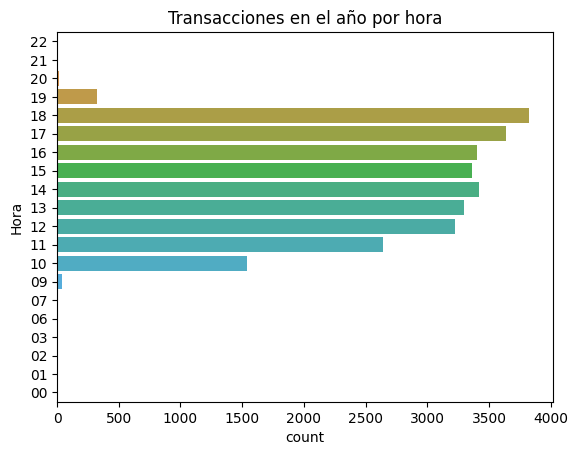

In [50]:
sns.countplot(y='hour', data=invoices)
plt.title('Transacciones en el año por hora')
plt.ylabel('Hora')
plt.show()

## Vendedores más productivos

In [51]:
invoices.groupby('StaffID')['InvoiceID'].count()

StaffID
1    2511
2    7745
3    9061
4    9437
Name: InvoiceID, dtype: int64

In [52]:
nombres = staff['Name']
d = {i+1: nombres[i] for i in range(len(nombres))}
d

{1: 'JEFE', 2: 'MARYCRUZ', 3: 'CARMEN', 4: 'LORENA'}

In [53]:
invoices['StaffID'] = invoices['StaffID'].map(d)

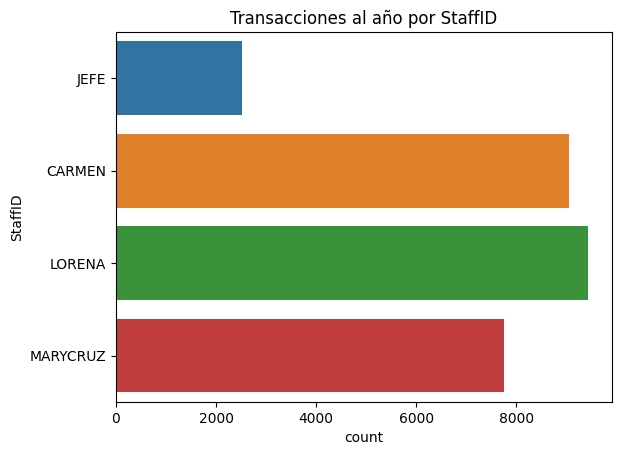

In [54]:
sns.countplot(y='StaffID', data=invoices)
plt.title('Transacciones al año por StaffID')
plt.show()

* ¿Existen días en la semana que disminuyan las ventas? ¿A qué se debe? ¿Qué podemos hacer?

In [55]:
invoices['dia'] = invoices['Date Creation'].dt.strftime('%d')

In [56]:
dias = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
invoices.sort_values(by='Date Invoice', ascending=True, inplace=True)
invoices['dia_nombre'] = invoices['Date Invoice'].dt.day_name()
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,IVA,Total,Total letter,StaffID,Barcode,mes,hour,dia,dia_nombre
3,4,4,2022-01-10 10:44:34,2022-01-10,47.88,9.12,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),CARMEN,3000046,1,10,10,Monday
45,46,46,2022-01-10 11:27:36,2022-01-10,82.32,15.68,98.0,(NOVENTA Y OCHO PESOS 00/100 M.N.),LORENA,3000462,1,11,10,Monday
46,47,47,2022-01-10 11:29:01,2022-01-10,492.24,93.76,586.0,(QUINIENTOS OCHENTA Y SEIS PESOS 00/100 M.N.),LORENA,3000471,1,11,10,Monday
47,48,48,2022-01-10 11:29:21,2022-01-10,63.84,12.16,76.0,(SETENTA Y SEIS PESOS 00/100 M.N.),CARMEN,3000480,1,11,10,Monday
48,49,49,2022-01-10 11:29:36,2022-01-10,131.88,25.12,157.0,(CIENTO CINCUENTA Y SIETE PESOS 00/100 M.N.),LORENA,3000499,1,11,10,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28730,28731,28721,2022-12-19 17:19:34,2022-12-19,105.00,20.00,125.0,(CIENTO VEINTICINCO PESOS 00/100 M.N.),CARMEN,3287310,12,17,19,Monday
28689,28690,28680,2022-12-19 14:59:41,2022-12-19,64.68,12.32,77.0,(SETENTA Y SIETE PESOS 00/100 M.N.),CARMEN,3286903,12,14,19,Monday
28658,28659,28649,2022-12-19 12:18:01,2022-12-19,41.16,7.84,49.0,(CUARENTA Y NUEVE PESOS 00/100 M.N.),LORENA,3286596,12,12,19,Monday
28698,28699,28689,2022-12-19 15:24:19,2022-12-19,206.64,39.36,246.0,(DOSCIENTOS CUARENTA Y SEIS PESOS 00/100 M.N.),MARYCRUZ,3286994,12,15,19,Monday


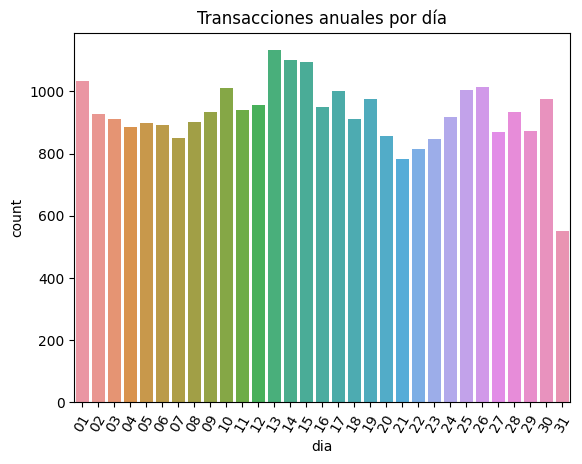

In [57]:
invoices.sort_values(by='dia', ascending=True, inplace=True)

sns.countplot(x='dia', data=invoices)
plt.title('Transacciones anuales por día')
plt.xticks(rotation=60)
plt.show()

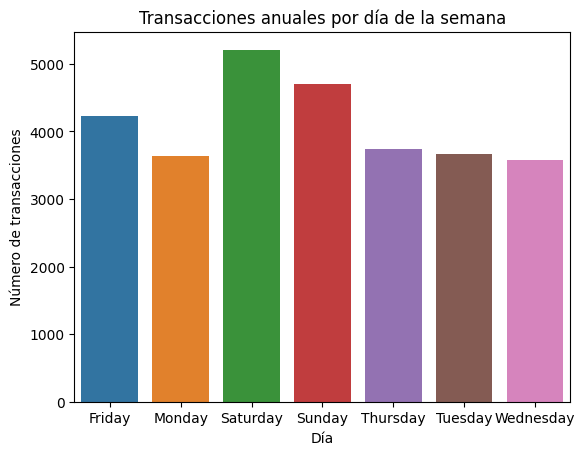

In [58]:
# gráfica por días de la semana
invoices.sort_values(by='dia_nombre', ascending=True, inplace=True)
sns.countplot(x='dia_nombre', data=invoices)
plt.title('Transacciones anuales por día de la semana')
plt.xlabel('Día')
plt.ylabel('Número de transacciones')
plt.show()